In [10]:
from data_preporation_field_scale import field_scale
import geopandas as gpd
import geemap
import ee
import datetime
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
region_geometry = gpd.read_file('vector_data/our_fields_for_animation.geojson')
ROIs = gpd.read_file('vector_data/our_fields_for_animation.geojson')
dates = [(f'20{i}-01-01',f'20{i}-12-31') for i in range(19,22)]
import geemap

In [17]:
dates

[('2019-01-01', '2019-12-31'),
 ('2020-01-01', '2020-12-31'),
 ('2021-01-01', '2021-12-31')]

('2018-11-15', '2019-11-15')
  Местное время в Буденновске     T     Po      P   Pa   U  \
0            15.11.2019 21:00   5.9  762.3  775.0  0.0  76   
1            15.11.2019 18:00   7.7  762.3  774.8  0.9  71   
2            15.11.2019 15:00  10.5  761.4  773.8 -0.1  57   
3            15.11.2019 12:00   8.9  761.5  774.0 -0.4  63   
4            15.11.2019 09:00   5.6  761.9  774.6  0.8  78   
5            15.11.2019 06:00   2.6  761.1  773.9 -0.1  91   
6            15.11.2019 03:00   2.9  761.2  773.9 -0.3  91   
7            15.11.2019 00:00   4.1  761.5  774.3 -0.2  86   
8            14.11.2019 21:00   5.1  761.7  774.4  0.8  78   
9            14.11.2019 18:00   8.3  760.9  773.4  0.7  69   

                                    DD  Ff  ff10   ff3  ...  \
0              Ветер, дующий с востока   5   NaN  12.0  ...   
1              Ветер, дующий с востока   5  10.0  12.0  ...   
2              Ветер, дующий с востока   7  12.0  15.0  ...   
3  Ветер, дующий с востоко-юго-восто

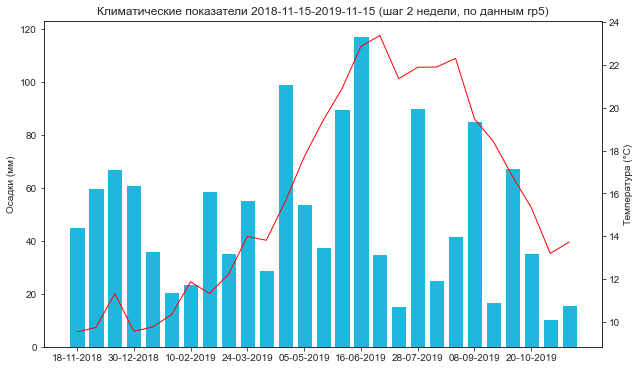

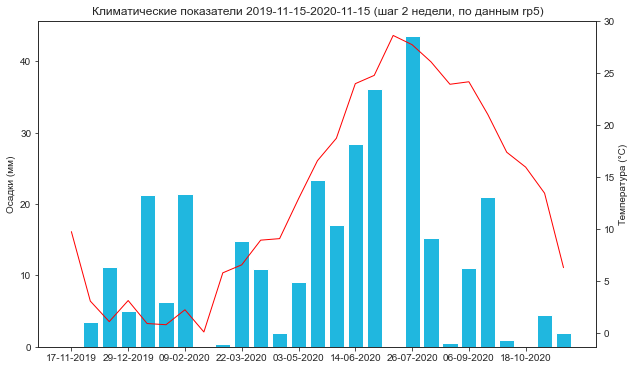

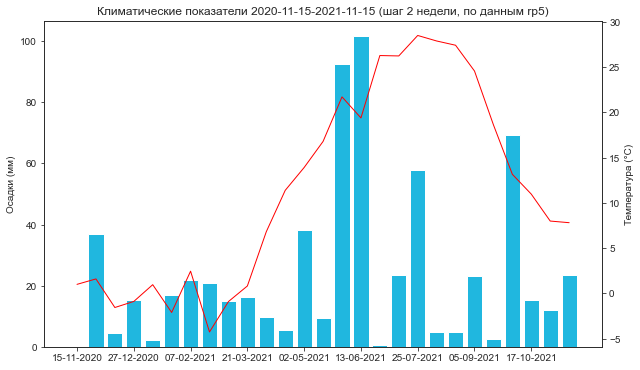

In [13]:

climat_df = pd.DataFrame()
for i in dates:
    print(i)
    for_NDTI = field_scale(i[0] , i[1] , ROIs , region_geometry)
    little_climat = for_NDTI.anual_weather(download = 'yes',plot_data ='yes')
    climat_df = climat_df.append(little_climat)


In [8]:
climat_df.to_csv('climat_data_archangelskoe_3Years.csv')

In [28]:
with open("./raster_data/file_list.txt", "r+") as file_object:
    file_list = file_object.read().split('\n')
    print ("Field_scale_sentinel2_2019-01-10_scene.tif" in file_list)


True


In [44]:
climat_df = pd.DataFrame()
for i in dates:
    print(i)
    for_NDTI = field_scale(i[0] , i[1] , ROIs , region_geometry)
    for_NDTI.get_collection()
    little_climat = for_NDTI.anual_weather(download = 'yes',plot_data ='no')
    climat_df = climat_df.append(little_climat)





('2018-11-15', '2019-11-15')
2019-01-10
file Field_scale_sentinel2_2019-01-10_scene.tif alredy exists
2019-02-19
file Field_scale_sentinel2_2019-02-19_scene.tif alredy exists
2019-03-21
file Field_scale_sentinel2_2019-03-21_scene.tif alredy exists
2019-03-26
file Field_scale_sentinel2_2019-03-26_scene.tif alredy exists
2019-03-31
file Field_scale_sentinel2_2019-03-31_scene.tif alredy exists
2019-04-30
file Field_scale_sentinel2_2019-04-30_scene.tif alredy exists
2019-05-15
file Field_scale_sentinel2_2019-05-15_scene.tif alredy exists
2019-05-30
file Field_scale_sentinel2_2019-05-30_scene.tif alredy exists
2019-06-09
file Field_scale_sentinel2_2019-06-09_scene.tif alredy exists
2019-06-14
file Field_scale_sentinel2_2019-06-14_scene.tif alredy exists
2019-07-04
file Field_scale_sentinel2_2019-07-04_scene.tif alredy exists
2019-07-19
file Field_scale_sentinel2_2019-07-19_scene.tif alredy exists
2019-07-29
file Field_scale_sentinel2_2019-07-29_scene.tif alredy exists
2019-08-03
file Field_

In [46]:
climat_df.to_csv('climat_data_archangelskoe_3Years.csv')

In [54]:
for_minNDTI = field_scale("2021-07-15" , finish , ROIs , region_geometry)
for_minNDTI.get_collection()
minNDTI = for_minNDTI.result_collection.select('NDTI').min()
CRS = for_minNDTI.result_collection.first().select('B1').projection().getInfo()['crs']
minNDTI = minNDTI.reproject(CRS)


In [55]:
geemap.ee_export_image(minNDTI, filename='kursk/minNDTI_kursk.tif', region= geemap.geopandas_to_ee(region_geometry).geometry() ,scale = 10,  file_per_band=False)


Generating URL ...
Please wait ...
Data downloaded to c:\Users\User\Google Диск\python_notebooks\total_archangelskiy\field_scale\kursk\minNDTI_kursk.tif


In [27]:
img = for_NDTI.result_collection.first()